In [8]:
import torch
from torch import nn

import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [9]:
# P2.1:

size = 1000
mean1 = [-1, -4]
mean2 = [3, -7]
cov = [[1, 0.6], [0.6, 1]]
distri1 = np.random.multivariate_normal(mean1, cov, size)
distri2 = np.random.multivariate_normal(mean2, cov, size)
data= np.concatenate((distri1, distri2), axis=0)
scaler= StandardScaler()
data= scaler.fit_transform(data)
labels= np.concatenate((np.zeros(size), np.ones(size)), axis=0)
# Generar datos en este bloque

###

X = torch.from_numpy(data) # COMPLETAR: Almacenar las features generadas en esta variable
y = torch.from_numpy(labels) # COMPLETAR: Almacenar las clases en esta variable

train_dataset = torch.utils.data.TensorDataset(X, y) # COMPLETAR: Crear el TensorDataset con los datos generados

In [10]:
# P2.2
# Definir en este bloque una clase llamada LinearModel que herede de nn.Module
# Siga las instrucciones de la pregunta P2.2 para definir su modelo en esta nueva clase

class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.linear(x)


In [11]:
# P2.3
#. Entrene este modelo sobre los datos anteriores (tarea de clasificación). No es necesario generar
#un dataset de validación ni reportar un gráfico del loss.
model = LinearModel() # COMPLETAR: Inicialice el modelo con el tamaño de entrada correcto

epochs = 100
batch_size = 8
lr = 1e-3

train_loader= torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

model.train()

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    cum_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.float()
        y_predicted = model(x_batch)
        y_batch = y_batch.reshape(-1, 1).float()
        loss = criterion(y_predicted, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cum_loss += loss.item()
    print(f"Loss: {cum_loss / len(train_loader)}")


    

Epoch 1/100
Loss: 0.9129018502235413
Epoch 2/100
Loss: 0.7954960761070251
Epoch 3/100
Loss: 0.6976158764362336
Epoch 4/100
Loss: 0.616170691370964
Epoch 5/100
Loss: 0.5483412026166916
Epoch 6/100
Loss: 0.49164080774784086
Epoch 7/100
Loss: 0.44400195813179016
Epoch 8/100
Loss: 0.4037152415513992
Epoch 9/100
Loss: 0.36941162329912186
Epoch 10/100
Loss: 0.3399947518110275
Epoch 11/100
Loss: 0.31457551616430285
Epoch 12/100
Loss: 0.2924547660946846
Epoch 13/100
Loss: 0.27308030712604525
Epoch 14/100
Loss: 0.25600257676839827
Epoch 15/100
Loss: 0.24086126321554183
Epoch 16/100
Loss: 0.227360113799572
Epoch 17/100
Loss: 0.21525930833816528
Epoch 18/100
Loss: 0.20436149901151657
Epoch 19/100
Loss: 0.19450294959545136
Epoch 20/100
Loss: 0.1855451372861862
Epoch 21/100
Loss: 0.1773743648827076
Epoch 22/100
Loss: 0.16989447298645974
Epoch 23/100
Loss: 0.1630239437520504
Epoch 24/100
Loss: 0.15669309705495835
Epoch 25/100
Loss: 0.1508425103724003
Epoch 26/100
Loss: 0.14541993972659112
Epoch 27/1

Para la siguiente pregunta puede ser útil lo siguiente:

Para acceder a un módulo dentro de la capa Sequential indexe como si fuese una lista:

**EJEMPLO:**
```
my_seq_layer = nn.Sequential(modulo1, modulo2)
my_set_layer[0] # entrega modulo1
my_set_layer[1] # entrega modulo2
```
Para acceder a los pesos y biases de una capa lineal utilice los atributos `weight` y `bias`, respectivamente:

**EJEMPLO:**
```
my_linear_layer = nn.Linear(n_entradas, n_salidas)
my_linear_layer.weight # entrega los pesos
my_linear_layer.bias # entrega los biases
```

**IMPORTANTE**: Los pesos y los biases son parámetros que requiren gradiente (su atributo `requires_grad` es `True`). Como tales, si ustedes realizarán operaciones con ellos, estas operaciones almacenarán lo que se llama un grafo de computación, que lleva un registro de todas las funciones aplicadas. Este grafo es utilizado por pytorch para realizar luego backpropagation. Si ustedes sólo quieren utilizar estos parámetros para operaciones que no requieran más adelante un cálculo de gradiente, entonces apliquen el método detach() a estos parámetros. Esta función (como su nombre lo dice) "despega" a los parámetros del grafo de computación entregando una copia en forma de tensores normales.

In [12]:
# P2.4
# Imprima los pesos y los biases de su modelo. Además imprima el atributo shape de cada uno.
# ¿Cuántos parámetros tiene su modelo?
weights = model.linear[0].weight.detach().numpy()
bias = model.linear[0].bias.detach().numpy()
print(f"weights: {weights}")
print(f"bias: {bias}")
print(f"weights shape: {weights.shape}")
print(f"bias shape: {bias.shape}")


weights: [[ 2.0621204 -2.0759578]]
bias: [-0.04234289]
weights shape: (1, 2)
bias shape: (1,)


In [13]:
def plot_hyperplane(w, b, X):
    """
    Grafica una recta que representa el hiperplano
    generado por una capa lineal con pesos w y biases b.

    Args:
        w (torch.tensor): Pesos de la capa lineal
        b (torch.tensor): Bias de la capa lineal
        X (torch.tensor or np.array): Datos de tamaño 2000x2.
    """
    w = w.reshape(-1)

    a = -w[0] / w[1]
    xx = np.linspace(X[:, 0].min(), X[:, 0].max())
    yy = a * xx - (model.linear[0].bias.detach().numpy().item()) / w[1]
    plt.plot(xx, yy)

    return xx, yy

j:\Pytorch\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
j:\Pytorch\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
j:\Pytorch\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
j:\Pytorch\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
j:\Pytor

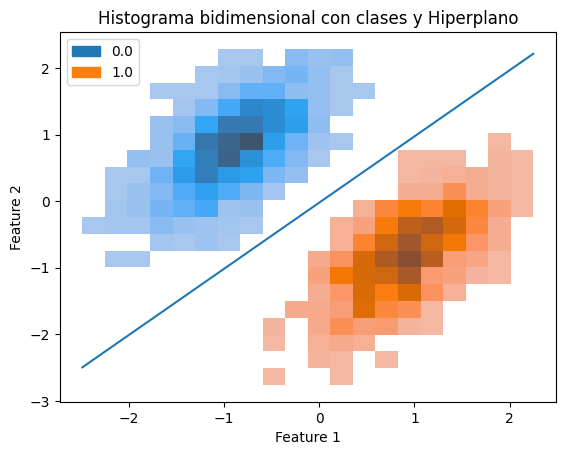

In [14]:
# P2.5
# Grafique un histograma bidimensional de los datos
sns.histplot(x=X[:, 0], y=X[:, 1], hue=y, bins=20)

# COMPLETAR: Grafique el hiperplano separador con la función plot_hyperplane
#5. Grafique los datos y el hiperplano separador obtenido luego de entrenar en un mismo gráfico.
#Para esto utilice la función auxiliar entregada en el material de la tarea (lea la documentación
#de esta función). Para realizar este gráfico no invierta la normalización de los datos del inicio.
plot_hyperplane(weights, bias, X.numpy())
# COMPLETAR: Agregue título, labels, etc.
plt.title("Histograma bidimensional con clases y Hiperplano")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()